## Erste Analysen des Datensets
Erste Visualisierungen von Abhängigkeiten bzw. Korrelationen verschiedener Parameter.

### Datenset laden & Head zeigen
Lädt Daten und zeigt Auszug der ersten paar Reihen.


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import src.package.importer as im
import src.package.consts as c
import src.package.charts as charts
import pandas as pd

# set size of seaborn plots
charts.set_plot_size(sns)
pd.set_option('display.max_rows', 50)

df = im.get_extended_dataset('../package/datasets/full_dataset.csv')
df_full = im.get_dataset('../package/datasets/full_dataset.csv')
print(df_full.info(verbose=True))
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 182 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    id                                       int64  
 1    source                                   object 
 2    verification_status                      object 
 3    title                                    object 
 4    neubau_umbau                             object 
 5    comment                                  object 
 6    nom_address                              object 
 7    nom_zip                                  float64
 8    nom_location_name                        object 
 9    nom_country                              object 
 10   nom_economy_region                       object 
 11   index_year                               float64
 12   index_month                              float64
 13   index_source                             object 
 14   planni

,id,source,verification_status,title,neubau_umbau,comment,nom_address,nom_zip,nom_location_name,nom_country,...,bool_has_attachments,dyn_kreis_type,nom_construction_start,nom_main_allocation_time,nom_construction_end,nom_bki_kostenstand,total_expenses,cost_ref_gf,cost_ref_gfs,ratio_hnf_gf
0,1124,statistik stadt zürich_1_1914_38,VERIFIED_OK_BUT_UNSUITABLE,"MFH Schaffhauserstrasse 105, 8057 Zürich",NEUBAU,GF gemessen 18.0 x 10.0 x 5 = 900m2 nochmals ...,Schaffhauserstrasse 105,8057.0,Zürich,SWITZERLAND,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1118,statistik stadt zürich_2_1939_48,VERIFIED_OK_BUT_UNSUITABLE,"MFH Zeppelinstrasse 59, 8057 Zürich",NEUBAU,"GF anhand der alten Pläne gemessen = 650m2, no...",Zeppelinstrasse 59,8057.0,Zürich,SWITZERLAND,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1154,statistik stadt zürich_3_1948_57,VERIFIED_OK_BUT_UNSUITABLE,"MFH Zeppelinstrasse 59, 8057 Zürich",NEUBAU,"gleiches Haus wie Zeppelinstrasse 59, jedoch ...",Zeppelinstrasse 59,8057.0,Zürich,SWITZERLAND,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1127,statistik stadt zürich_4_1957_66,VERIFIED_OK_BUT_UNSUITABLE,"MFH Letzigraben 209_221, 8047 Zürich",NEUBAU,Angabe Rauminhalt SIA 116 aus Zürcher Statist...,Letzigraben 209 - 221,8047.0,Zürich,SWITZERLAND,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1097,statistik stadt zürich_5_1966_76,VERIFIED_OK_BUT_UNSUITABLE,MFH Letzigraben 209-221_8047Zürich,NEUBAU,"GF gemessen: ca. 4122m2, nochmals überprüfen!",Letzigraben 209-221,8047.0,Zürich,SWITZERLAND,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Quellen

In [26]:
counts = df_full["source"].value_counts()
counts.head(30)

BKI Objektdaten N13              111
BKI Objektdaten Band 1           104
BKI Objektdaten N15              100
BKI Objektdaten N12               99
BKI Objektdaten N16               90
N3                                88
BKI Objektdaten N11               87
BKI Objektdaten E6                86
BKI Objektdaten Band 2            83
BKI Objektdaten N10               81
BKI Objektdaten E5                60
BKI Objektdaten F7                59
BKI Objektdaten A9                54
BKI Objektdaten A10               53
BKI Objektdaten F8                50
b+p baurealisation ag             50
BKI Objektdaten F6                43
BKI Objekte N4                    40
F4                                38
AGV Kleinbauten                   35
BKI Objektdaten A5                33
BKI Objektdaten E4                24
Baulink AG                        24
BKI Objektdaten N14               23
OAK Bildungsbauten crb D/2017     20
BKI Objektdaten N7 Neubau         19
BKI Objektdaten N4                18
B

### Prüfung der Daten
Zeigt Informationen zum Datenset an.<br>
z.B. Anzahl fehlender Daten. (Gefiltert auf Relevanz)


In [15]:
filtered_df = im.select_relevant_features(df)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nom_usage_main          1197 non-null   object 
 1   usage_cluster           1195 non-null   object 
 2   nom_facade              1529 non-null   object 
 3   area_total_floor_416    1232 non-null   float64
 4   area_net_floor_416      332 non-null    float64
 5   area_main_usage         570 non-null    float64
 6   volume_total_416        898 non-null    float64
 7   volume_total_116        568 non-null    float64
 8   num_buildings           3503 non-null   int64  
 9   num_floors_overground   1917 non-null   float64
 10  num_floors_underground  3503 non-null   float64
 11  total_expenses          1157 non-null   float64
 12  cost_ref_gf             1088 non-null   float64
 13  cost_ref_gfs            879 non-null    float64
 14  ratio_hnf_gf            567 non-null    

In [16]:
df[c.FIELD_USAGE_CLUSTER].value_counts()

WOHNEN           359
SCHULEN          246
BUERO            136
HALLEN           127
BETRIEB           78
BEHERBERGUNG      77
KULTUS_KULTUR     59
GESUNDHEIT        41
ANDERES           26
OFFENE_BAUTEN     14
TECHNIK           14
IRRELEVANT        12
AUSSENANLAGEN      6
Name: usage_cluster, dtype: int64

In [17]:
filtered_df.describe()

,area_total_floor_416,area_net_floor_416,area_main_usage,volume_total_416,volume_total_116,num_buildings,num_floors_overground,num_floors_underground,total_expenses,cost_ref_gf,cost_ref_gfs,ratio_hnf_gf
count,1232.000000,332.000000,570.000000,898.000000,568.000000,3503.000000,1917.000000,3503.000000,1.157000e+03,1088.000000,8.790000e+02,567.000000
mean,6090.018669,4921.039157,3186.898246,22698.154788,26885.875000,1.610049,2.874622,0.397745,1.617252e+07,6106.910846,1.130620e+04,0.568801
std,8286.297427,6663.631239,4300.573997,31157.601173,36868.254161,23.558155,2.174336,0.627090,2.416726e+07,8189.910374,5.004698e+04,0.164996
min,0.000000,98.000000,41.000000,0.000000,82.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1.030000e+02,0.088281
25%,1292.500000,1100.750000,639.250000,4028.250000,6297.000000,1.000000,1.800000,0.000000,3.370000e+06,1361.750000,2.101000e+03,0.484037
50%,3277.000000,2219.000000,1582.000000,11727.000000,15565.000000,1.000000,2.500000,0.000000,8.850000e+06,3383.000000,5.153000e+03,0.549635
75%,7249.750000,5963.250000,3857.750000,28786.250000,31158.750000,1.000000,4.000000,1.000000,1.854992e+07,7400.750000,1.039400e+04,0.628128
max,75328.000000,50240.000000,29437.000000,272000.000000,315370.000000,1394.000000,36.000000,5.000000,3.400000e+08,75328.000000,1.070000e+06,2.719323


<br>

---

<br>

## Korrelationen

### Correlation Heatmap
Zeigt Korrelationen zwischen unterschiedlichen Werten auf. (Big Picture)

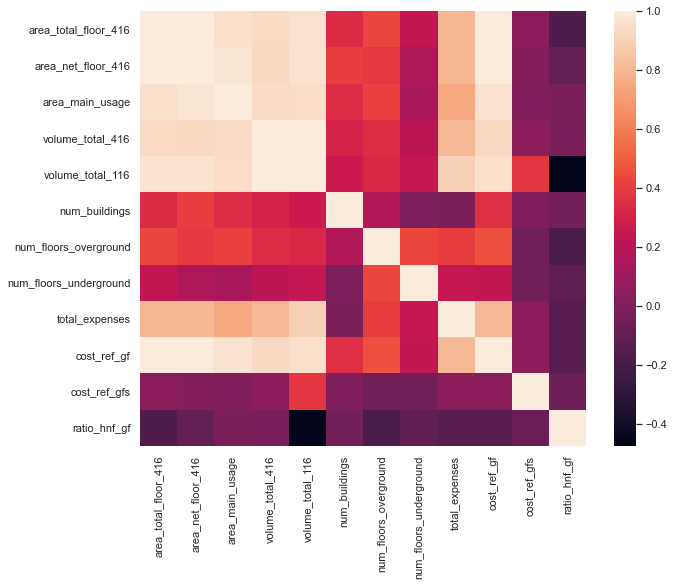

In [18]:
sns.heatmap(filtered_df.corr());

<br>

---

<br>

### Geschossfläche GF
Zeigt **Hauptnutzfläche** in relation zur **Geschossfläche**.
<br>Optional: Anzahl Stockwerke

<AxesSubplot:xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF'>

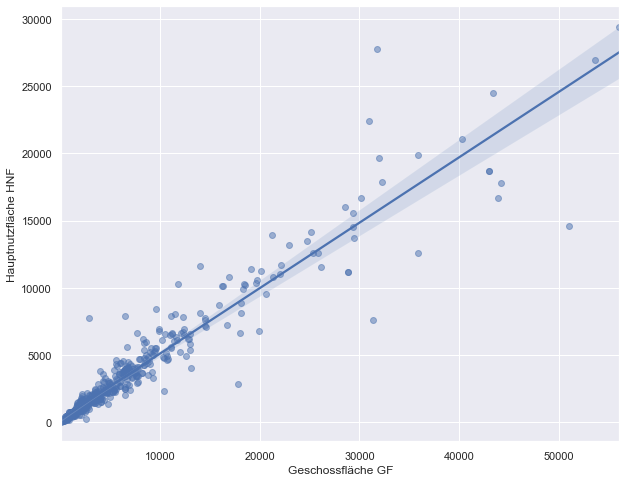

In [19]:
charts.regplot_gf_hnf(df)

<br>

---

<br>

### Geschossfläche GF
Zeigt **Hauptnutzfläche** in relation zur **Geschossfläche**.<br>
Zusätzliche Kategorisierung nach **Hauptnutzung**.<br>
<br>
Auffällige Ausreisser bei "Typ" Technik (deshalb entfernt von Grafik).

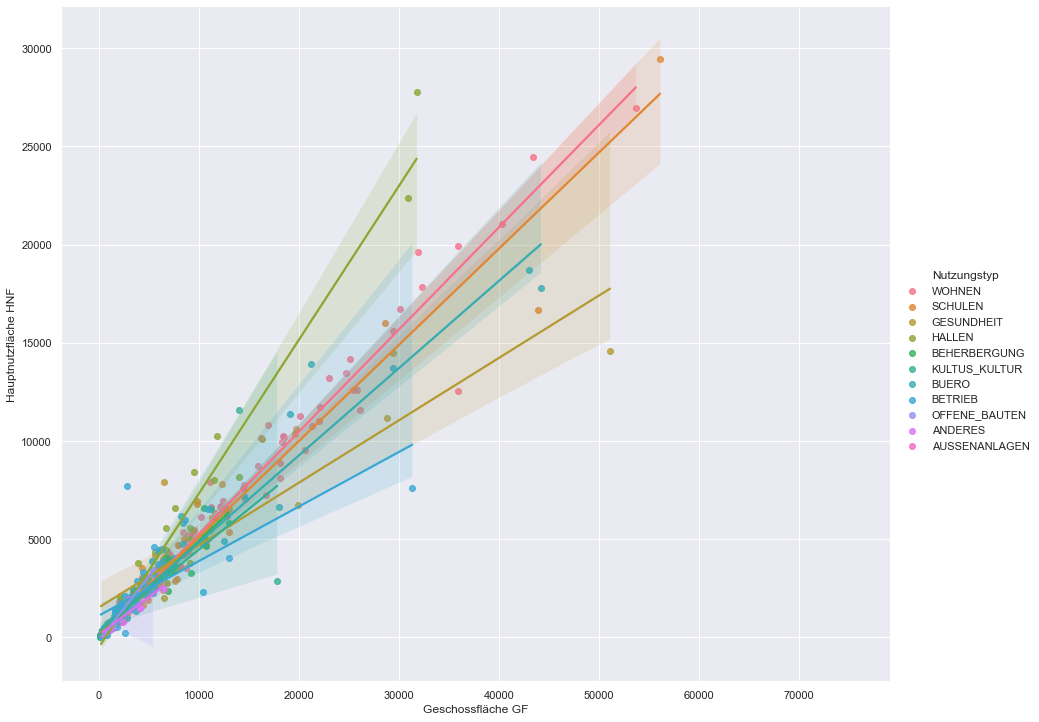

In [20]:
filtered_df = df[(df[c.FIELD_USAGE_CLUSTER] != 'IRRELEVANT') & (df[c.FIELD_USAGE_CLUSTER] != 'TECHNIK')]

gf = sns.lmplot(
    data=filtered_df,
    x=c.FIELD_AREA_TOTAL_FLOOR_416, y=c.FIELD_AREA_MAIN_USAGE,
    hue=c.FIELD_USAGE_CLUSTER,
    height=charts.CHART_HEIGHT, aspect=charts.CHART_HEIGHT/charts.CHART_WIDTH
)

gf.set(xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF')
gf.legend.set_title('Nutzungstyp')

### Geschossfläche und Stockwerke
Zeigt **Geschossfläche** in relation zur Anzahl **Stockwerke**.

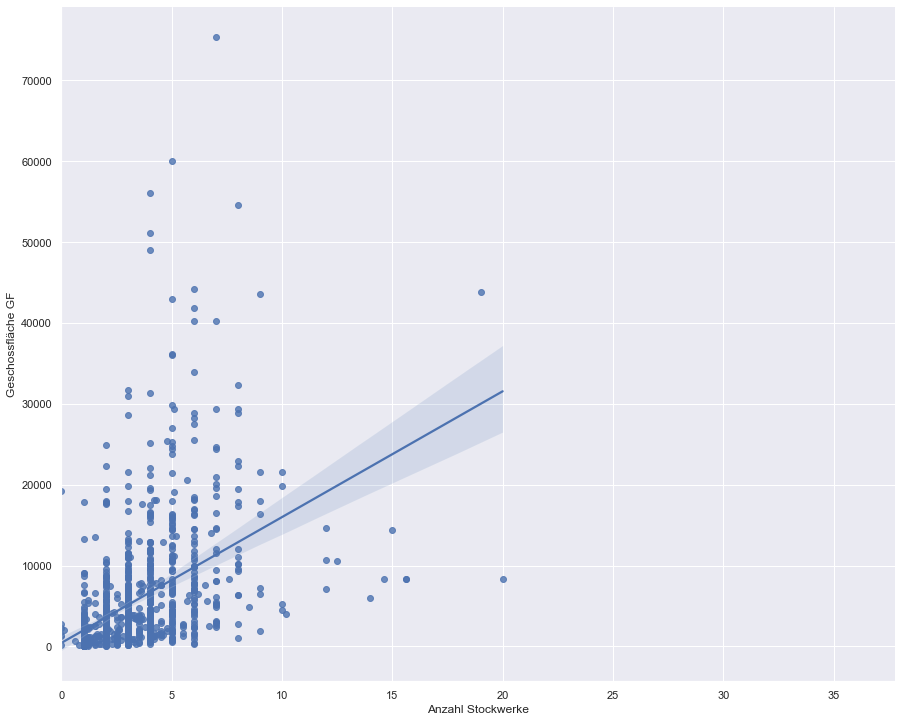

In [21]:
gf = sns.lmplot(
    data=df,
    x=c.FIELD_NUM_FLOORS_OVERGROUND, y=c.FIELD_AREA_TOTAL_FLOOR_416,
    height=charts.CHART_HEIGHT, aspect=charts.CHART_HEIGHT/charts.CHART_WIDTH
    # hue=im.FIELD_USAGE_CLUSTER
)

gf.set(xlabel='Anzahl Stockwerke', ylabel='Geschossfläche GF')

<br>

---

<br>

## Verteilungen
Zeigt Verteilungen unterschiedlicher Features.

### Hauptnutzfläche
Zeigt die Verteilung der Grösse **Hauptnutzflächen**<br>
Aufteilung nach Cluster möglich.
<br>

[Text(0.5, 0, 'Hauptnutzfläche HNF'), Text(0, 0.5, 'Vorkommen')]

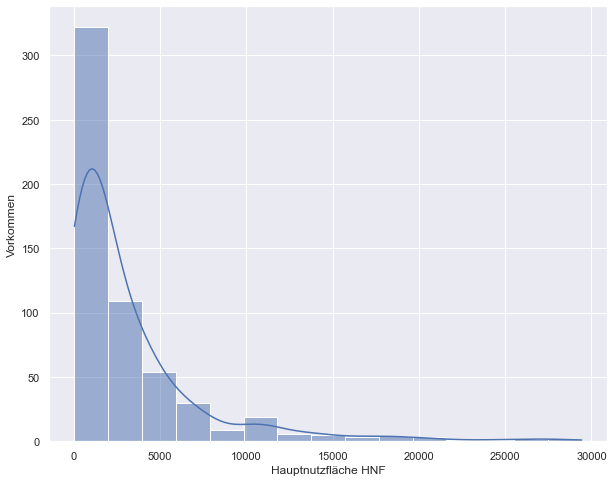

In [22]:
gf = sns.histplot(
    data=df,
    x=c.FIELD_AREA_MAIN_USAGE,
    # hue=im.FIELD_USAGE_CLUSTER,
    bins=15,
    kde='true'
)

gf.set(xlabel='Hauptnutzfläche HNF', ylabel='Vorkommen')

### Stockwerke
Zeigt die Verteilung unterschiedlicher Anzahl **Stockwerke**<br>
Aufteilung nach Cluster möglich.
<br>

[Text(0.5, 0, 'Anzahl Stockwerke'), Text(0, 0.5, 'Vorkommen')]

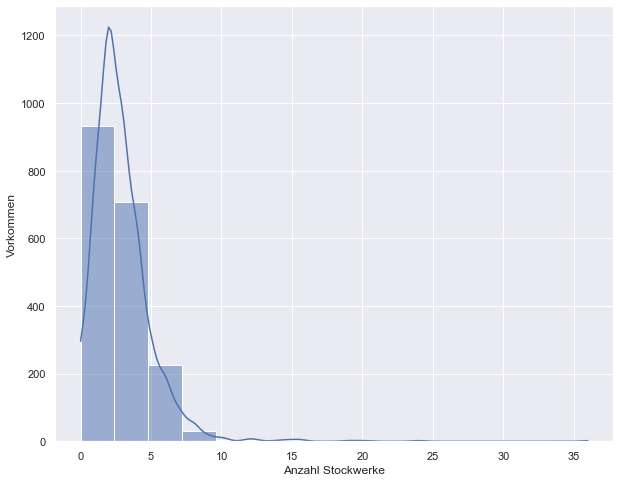

In [23]:
gf = sns.histplot(
    data=df,
    x=c.FIELD_NUM_FLOORS_OVERGROUND,
    # hue=im.FIELD_USAGE_CLUSTER,
    bins=15,
    kde='true'
)

gf.set(xlabel='Anzahl Stockwerke', ylabel='Vorkommen')

### Nutzungstypen
Zeigt die Verteilung unterschiedlicher **Nutzungstypen**<br>
Aufteilung nach Cluster möglich.
<br>

ConversionError: Failed to convert value(s) to axis units: 0       WOHNEN
1       WOHNEN
2       WOHNEN
3       WOHNEN
4       WOHNEN
         ...  
3498       NaN
3499       NaN
3500       NaN
3501       NaN
3502       NaN
Name: x, Length: 3503, dtype: object

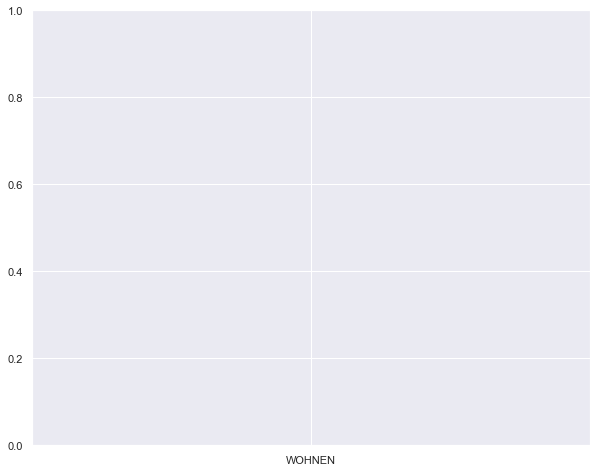

In [24]:
gf = sns.histplot(
    data=df,
    x=c.FIELD_USAGE_CLUSTER,
    # hue=im.FIELD_USAGE_CLUSTER,
    bins=15,
)

gf.set(xlabel='Nutzungstyp (Cluster))', ylabel='Vorkommen')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'
)

None  #don't show the label objects

### Lift
Zeigt Korrelation gruppiert nach Attribut **Lift vorhanden** auf.
<br>

In [ ]:
gf = sns.lineplot(
    data=df,
    x=c.FIELD_AREA_MAIN_USAGE,
    y=c.FIELD_AREA_TOTAL_FLOOR_416,
    # hue=im.FIELD_NUM_BUILDINGS
    hue=c.FIELD_ELEVATOR_PRESENT
)

gf.set_xlim(0, 11000)
gf.set(xlabel='Hauptnutzfläche HNF', ylabel='Geschossfläche GF')
plt.legend(title='Elevators', loc='upper left', labels=['No Elevator', 'Elevator present'])
